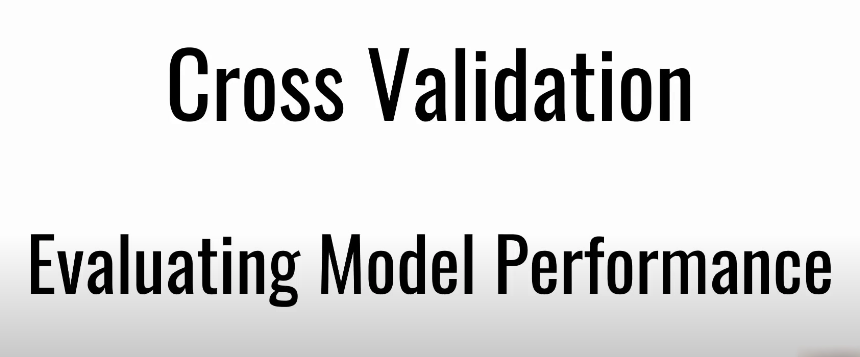

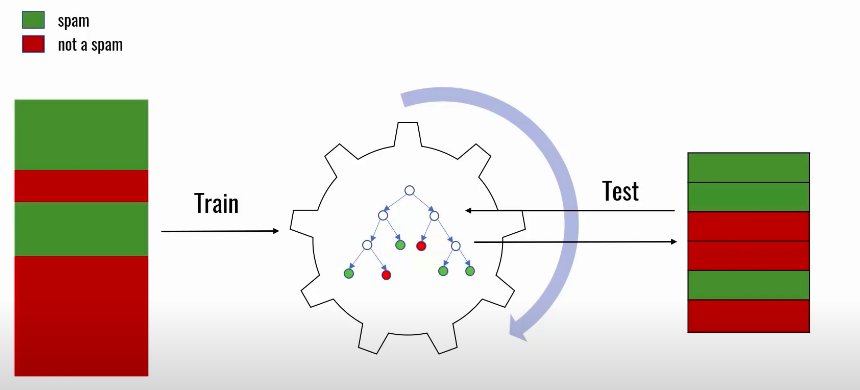

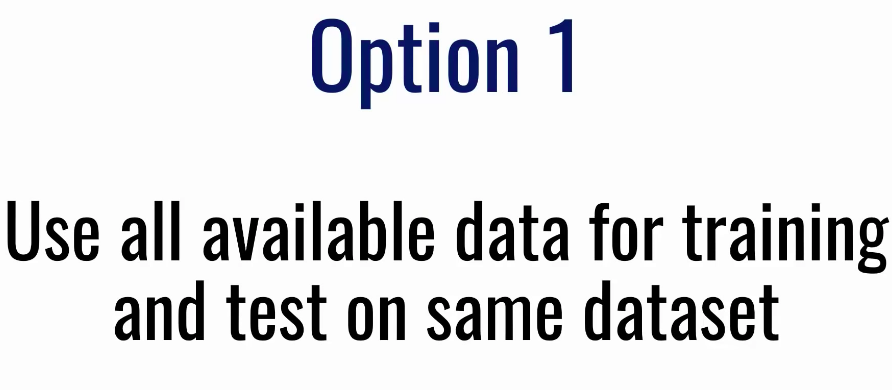

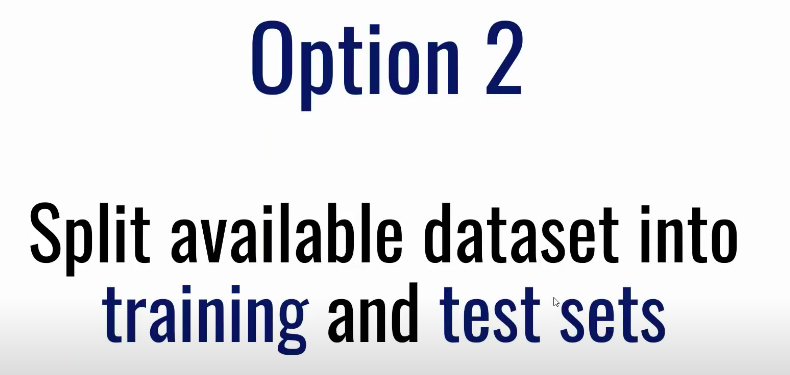

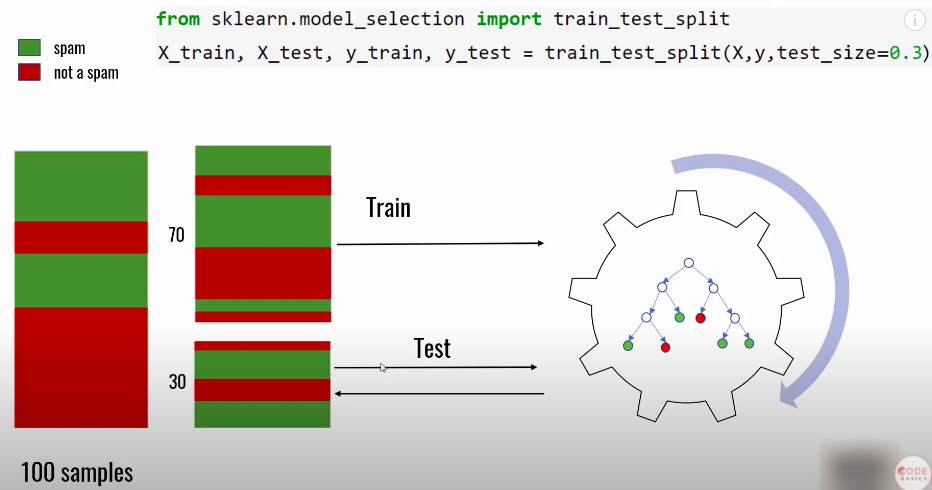

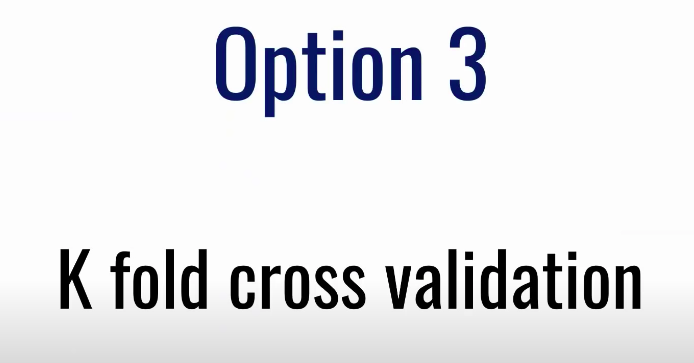

#### K FOLD Technique
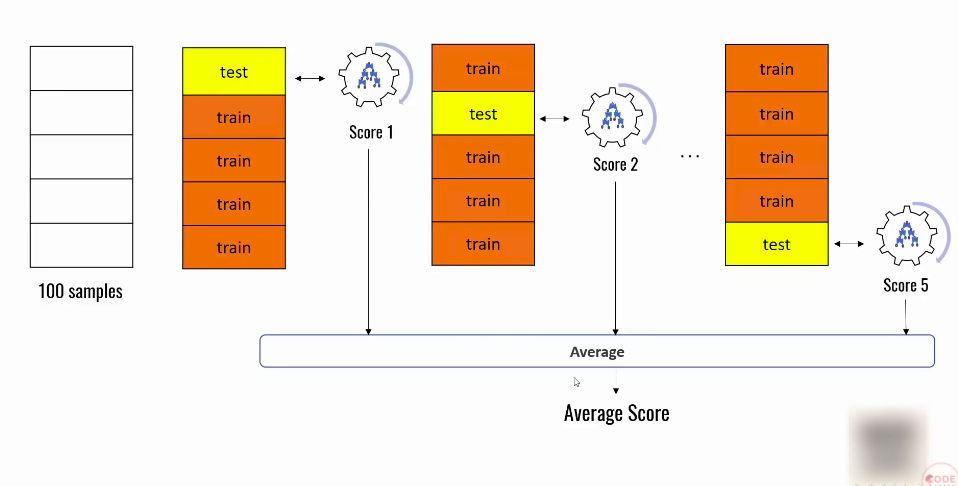

### Importing necessary things and the models to compare the performance

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(digits.data, digits.target, test_size=0.3) 

#### For Logistic Regression

In [5]:
lr = LogisticRegression() 
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Users/mashfiqshahriarzaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.95

#### For SVM

In [6]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9796296296296296

#### For RandomForest

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9703703703703703

### K Fold

In [27]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

#### Seeing the workings of KFOLD

In [28]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)  #splits into three parts and shuffles the
                                    #the training and the test data set
                                    # Testing with all the samples 

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


#### Defining a method to get scores of all the models

In [29]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [30]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

/Users/mashfiqshahriarzaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.95

In [31]:
get_score(SVC(), X_train, X_test, y_train, y_test)

0.9796296296296296

In [32]:
get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test)

0.9666666666666667

#### Using the Better KFold and Storing the performance

In [34]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [42]:
lr_score = []
svm_score = []
rf_score = []
for train_index, test_index in kf.split(digits.data): # split and shuffle the whole data set,  for the X, # for the y 
        X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                                digits.target[train_index], digits.target[test_index] 
        lr_score.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
        svm_score.append(get_score(SVC(), X_train, X_test, y_train, y_test))
        rf_score.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
        

/Users/mashfiqshahriarzaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mashfiqshahriarzaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [44]:
lr_score # spliting the dataset 3 times and calculate the performance 

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [45]:
svm_score

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [46]:
rf_score

[0.9432387312186978, 0.9532554257095158, 0.9215358931552587]

### Importing the method to Measure the performance of Various Models directly

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(LogisticRegression(), digits.data, digits.target)

/Users/mashfiqshahriarzaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mashfiqshahriarzaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [49]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [50]:
cross_val_score(RandomForestClassifier(), digits.data, digits.target)

array([0.93611111, 0.91388889, 0.9637883 , 0.96100279, 0.91922006])